# 1. Data Understanding & Exploration:

In [1]:
#import the necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.core.display import HTML
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split, RandomizedSearchCV, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.metrics import classification_report,accuracy_score,precision_score,recall_score
from scipy.stats import uniform, randint
from xgboost import XGBClassifier
import warnings
warnings.filterwarnings('ignore')
from scipy.stats import mode
import pickle

In [2]:
missing_values = ["n.a.","NA","n/a", "na","-"," " ] 
churn1=pd.read_csv("C://Users//mahes//Downloads//TelcomCustomer-Churn_1.csv",na_values = missing_values)

In [3]:
missing_values = ["n.a.","NA","n/a", "na","-"," " ]
churn2=pd.read_csv("C://Users//mahes//Downloads//TelcomCustomer-Churn_2.csv",na_values = missing_values)

In [4]:
churn1.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No


In [5]:
churn1.shape

(7043, 10)

In [6]:
# counting rows and columns and saving in separate variable
churn1_row=churn1.shape[0]
churn1_colmn=churn1.shape[1]
print("The rows in churn1 is",churn1_row, "and the columns in churn 1 data frame is " , churn1_colmn)

The rows in churn1 is 7043 and the columns in churn 1 data frame is  10


In [7]:
churn2_row=churn2.shape[0]
churn2_colmn=churn2.shape[1]
print("The rows in churn2 is",churn2_row, "and the columns in churn 2 data frame is " , churn2_colmn)

The rows in churn2 is 7043 and the columns in churn 2 data frame is  12


In [8]:
churn2.head()

,customerID,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,3668-QPYBK,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [9]:
#Merge two dataframes

churn=pd.merge(churn1,churn2,on='customerID')

In [10]:
churn.reset_index(drop=True,inplace=True)

In [11]:
churn.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [12]:
churn_row=churn.shape[0]
churn_colmn=churn.shape[1]
print("The rows in merged data frame is",churn_row, "and the columns is " , churn_colmn)

The rows in merged data frame is 7043 and the columns is  21


D. Verify if all the columns are incorporated in the merged DataFrame by using simple comparison Operator in Python

In [13]:
print(churn1_row and churn2_row == churn_row) #Comparing rows in data frame and merged data frame

True


Since it is written as True, the merged data frame do contains the same number of rows as the original dataframe

In [14]:
print(churn1_colmn and churn2_colmn == churn_colmn) # Comaring the merged data frame columns

False


The columns of merged data frame is not as same as the original one

2. Data Cleaning & Analysis:

Impute missing/unexpected values in the DataFrame

In [15]:
#check for missing values
churn.isnull().sum()

customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

In [16]:
churn.describe()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,7043.000000,7043.000000,7043.000000,7032.000000
mean,0.162147,32.371149,64.761692,2283.300441
std,0.368612,24.559481,30.090047,2266.771362
min,0.000000,0.000000,18.250000,18.800000
25%,0.000000,9.000000,35.500000,401.450000
50%,0.000000,29.000000,70.350000,1397.475000
75%,0.000000,55.000000,89.850000,3794.737500
max,1.000000,72.000000,118.750000,8684.800000


It is found that there is 11 missing values

In [17]:
churn.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [18]:
churn['TotalCharges'] = churn['TotalCharges'].fillna(churn['TotalCharges'].mode()[0]) #imputing as mode since it is catagorical value

In [19]:
churn.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

Make sure all the variables with continuous values are of ‘Float’ type.

In [20]:
churn['tenure']=churn['tenure'].astype(float)
churn['SeniorCitizen']=churn['SeniorCitizen'].astype(float)

In [21]:
churn.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   float64
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   float64
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [22]:
churn.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0.0,Yes,No,1.0,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0.0,No,No,34.0,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,3668-QPYBK,Male,0.0,No,No,2.0,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0.0,No,No,45.0,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0.0,No,No,2.0,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


Since MontlyCharge is in float data type Totalcharges column alone is convert to float as stated

gender
AxesSubplot(0.260833,0.125;0.503333x0.755)


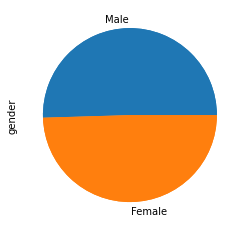

----------------------------------------------------------------------------------------------------
Partner
AxesSubplot(0.260833,0.125;0.503333x0.755)


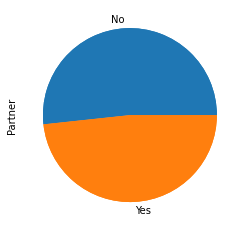

----------------------------------------------------------------------------------------------------
Dependents
AxesSubplot(0.260833,0.125;0.503333x0.755)


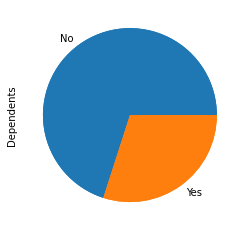

----------------------------------------------------------------------------------------------------
PhoneService
AxesSubplot(0.260833,0.125;0.503333x0.755)


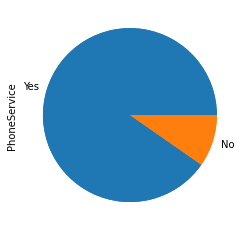

----------------------------------------------------------------------------------------------------
MultipleLines
AxesSubplot(0.260833,0.125;0.503333x0.755)


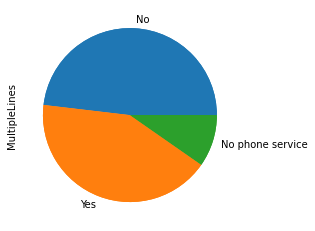

----------------------------------------------------------------------------------------------------
InternetService
AxesSubplot(0.260833,0.125;0.503333x0.755)


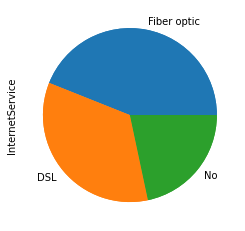

----------------------------------------------------------------------------------------------------
OnlineSecurity
AxesSubplot(0.260833,0.125;0.503333x0.755)


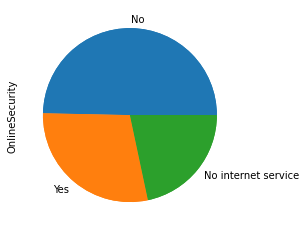

----------------------------------------------------------------------------------------------------
OnlineBackup
AxesSubplot(0.260833,0.125;0.503333x0.755)


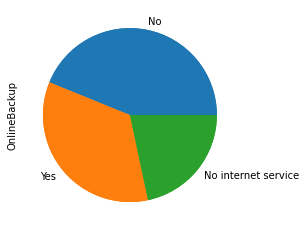

----------------------------------------------------------------------------------------------------
DeviceProtection
AxesSubplot(0.260833,0.125;0.503333x0.755)


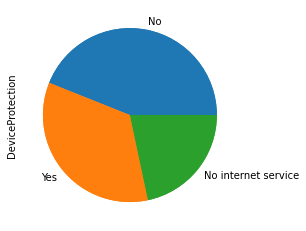

----------------------------------------------------------------------------------------------------
TechSupport
AxesSubplot(0.260833,0.125;0.503333x0.755)


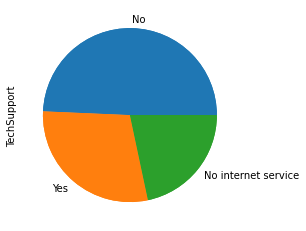

----------------------------------------------------------------------------------------------------
StreamingTV
AxesSubplot(0.260833,0.125;0.503333x0.755)


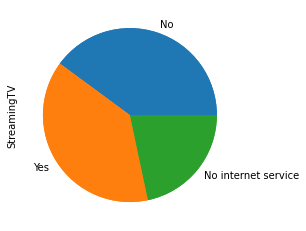

----------------------------------------------------------------------------------------------------
StreamingMovies
AxesSubplot(0.260833,0.125;0.503333x0.755)


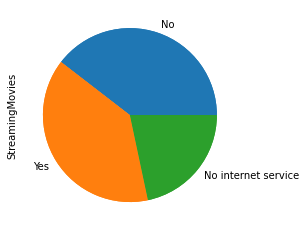

----------------------------------------------------------------------------------------------------
Contract
AxesSubplot(0.260833,0.125;0.503333x0.755)


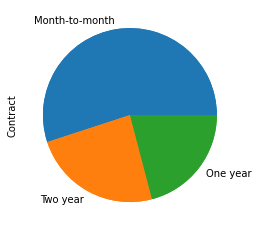

----------------------------------------------------------------------------------------------------
PaperlessBilling
AxesSubplot(0.260833,0.125;0.503333x0.755)


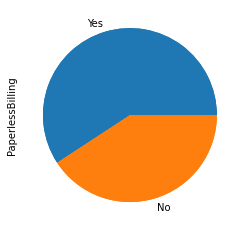

----------------------------------------------------------------------------------------------------
PaymentMethod
AxesSubplot(0.260833,0.125;0.503333x0.755)


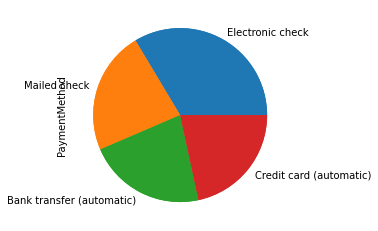

----------------------------------------------------------------------------------------------------
Churn
AxesSubplot(0.260833,0.125;0.503333x0.755)


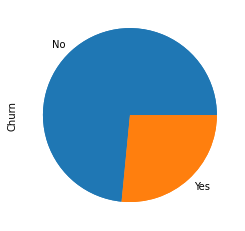

----------------------------------------------------------------------------------------------------


In [23]:
def churn_func(churn1):
    for i in churn.columns:
        if churn[i].dtype == 'O' and i !='customerID':
                print(i)
                abc = churn[i].value_counts()
                #plt.pie(abc)
                #plt.subplots(5,21)
                plt.pie(abc)
                print(churn[i].value_counts().plot.pie(y='churn[i]'))
                #plt.pie(abc,autopct='%.0f%%',labels=churn[i].value_counts().index)
                #plt.title(churn.columns,bbox={'facecolor':'0.9', 'pad':5})
                plt.show()
                print('-'*100)
churn_func(churn)

From the above pie chart i can understand that the gender is equally in the accepting the coonection 

In dependentens attribute the people of non dependent is more than the people of dependent

Of the operator many have opted for phone services

In [24]:
churn_copy=churn.copy()        #Create copy of the data
churn_copy.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0.0,Yes,No,1.0,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0.0,No,No,34.0,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,3668-QPYBK,Male,0.0,No,No,2.0,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0.0,No,No,45.0,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0.0,No,No,2.0,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [25]:
churn_copy.drop(['customerID',],axis=1,inplace=True) #Dropping CustomerID as it is not requires 

In [26]:
churn_copy.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0.0,Yes,No,1.0,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0.0,No,No,34.0,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,Male,0.0,No,No,2.0,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,0.0,No,No,45.0,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,0.0,No,No,2.0,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


Encode all the appropriate Categorical features with the best suitable approach

In [27]:
def encode_features(df):
    le = LabelEncoder()
    
    for i,col in enumerate(df.columns):
        if df[col].dtypes == 'object' and col !='customerID':
            df[col] = le.fit_transform(df[col])
    return df

In [28]:
churn.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0.0,Yes,No,1.0,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0.0,No,No,34.0,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,3668-QPYBK,Male,0.0,No,No,2.0,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0.0,No,No,45.0,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0.0,No,No,2.0,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [29]:
churn1 = encode_features(churn)

In [30]:
churn1.drop('customerID',inplace=True,axis=1)

In [31]:
churn1.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0,0.0,1,0,1.0,0,1,0,0,2,0,0,0,0,0,1,2,29.85,29.85,0
1,1,0.0,0,0,34.0,1,0,0,2,0,2,0,0,0,1,0,3,56.95,1889.50,0
2,1,0.0,0,0,2.0,1,0,0,2,2,0,0,0,0,0,1,3,53.85,108.15,1
3,1,0.0,0,0,45.0,0,1,0,2,0,2,2,0,0,1,0,0,42.30,1840.75,0
4,0,0.0,0,0,2.0,1,0,1,0,0,0,0,0,0,0,1,2,70.70,151.65,1


From the above output it is very clear it has created dummy for the object attribute

In [32]:
x=churn1.drop(["Churn"],axis=1)
y=churn1.pop("Churn")

Split the data into 80% train and 20% test

In [33]:
#Spliting the data
X_train, X_test, y_train,y_test = train_test_split(x, y, test_size=0.20, random_state=42) 

array([[<AxesSubplot:title={'center':'gender'}>,
        <AxesSubplot:title={'center':'SeniorCitizen'}>,
        <AxesSubplot:title={'center':'Partner'}>,
        <AxesSubplot:title={'center':'Dependents'}>],
       [<AxesSubplot:title={'center':'tenure'}>,
        <AxesSubplot:title={'center':'PhoneService'}>,
        <AxesSubplot:title={'center':'MultipleLines'}>,
        <AxesSubplot:title={'center':'InternetService'}>],
       [<AxesSubplot:title={'center':'OnlineSecurity'}>,
        <AxesSubplot:title={'center':'OnlineBackup'}>,
        <AxesSubplot:title={'center':'DeviceProtection'}>,
        <AxesSubplot:title={'center':'TechSupport'}>],
       [<AxesSubplot:title={'center':'StreamingTV'}>,
        <AxesSubplot:title={'center':'StreamingMovies'}>,
        <AxesSubplot:title={'center':'Contract'}>,
        <AxesSubplot:title={'center':'PaperlessBilling'}>],
       [<AxesSubplot:title={'center':'PaymentMethod'}>,
        <AxesSubplot:title={'center':'MonthlyCharges'}>,
        <A

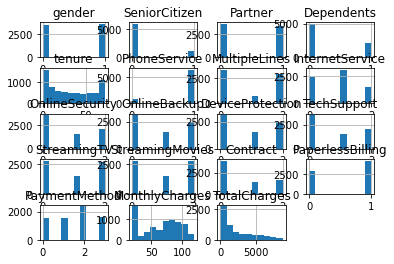

In [34]:
churn.hist()

From the above since the i can see sckewness in data i am using Standardization

Normalize/Standardize the data with the best suitable approach. 

In [36]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_train = sc.fit_transform(X_train)
x_test = sc.transform(X_test) 

# Model building and Improvement:

Train a model using XGBoost. Also print best performing parameters along with train and test performance

In [53]:
model = XGBClassifier()
model.fit(X_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, feature_types=None, gamma=0, gpu_id=-1,
              grow_policy='depthwise', importance_type=None,
              interaction_constraints='', learning_rate=0.300000012,
              max_bin=256, max_cat_threshold=64, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=0, ...)

In [54]:
y_pred = model.predict(X_test)
predictions = [round(value) for value in y_pred]
predictions

[1,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 0,


In [55]:
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

Accuracy: 80.34%


In [56]:
from sklearn import metrics
cm = metrics.confusion_matrix(y_test, y_pred)

In [57]:
cm_df = pd.DataFrame(cm)

In [58]:
print(metrics.classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.84      0.90      0.87      1036
           1       0.66      0.54      0.59       373

    accuracy                           0.80      1409
   macro avg       0.75      0.72      0.73      1409
weighted avg       0.79      0.80      0.80      1409



Improve the performence of Xboost

In [59]:
import xgboost as xgb
from sklearn.model_selection import GridSearchCV

In [64]:
params = { 'max_depth': [5],
           'learning_rate': [0.01, 0.05, 0.1],
           'n_estimators': [25,50],
           'colsample_bytree': [0.66]}
xgbr = XGBClassifier(seed=20)
clf = GridSearchCV(estimator=xgbr,param_grid=params,
                   scoring='neg_mean_squared_error', 
                   verbose=1)
clf.fit(x, y)
print("Best parameters:", clf.best_params_)
print("Lowest RMSE: ", (-clf.best_score_)**(1/2.0))

Fitting 5 folds for each of 6 candidates, totalling 30 fits
Best parameters: {'colsample_bytree': 0.66, 'learning_rate': 0.05, 'max_depth': 5, 'n_estimators': 50}
Lowest RMSE:  0.4444105601984183


In [66]:
clf.fit(x, y)
y_pred_grid = clf.predict(X_test)

Fitting 5 folds for each of 6 candidates, totalling 30 fits


In [67]:
accuracy = accuracy_score(y_test, y_pred_grid)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

Accuracy: 82.54%


In [68]:
cm = metrics.confusion_matrix(y_test, y_pred_grid)
cm_df = pd.DataFrame(cm)

In [69]:
print(metrics.classification_report(y_test,y_pred_grid))

              precision    recall  f1-score   support

           0       0.85      0.92      0.89      1036
           1       0.72      0.55      0.63       373

    accuracy                           0.83      1409
   macro avg       0.79      0.74      0.76      1409
weighted avg       0.82      0.83      0.82      1409



Earlier (befor tuning) the Accuracy was 79.56 and after tuning the accuracy is increased to 82.54%

Part B

In [76]:
def preprocess_data(path_to_csv,target_feature):
    df = pd.read_csv("C://Users//mahes//Downloads//TelcomCustomer-Churn_1.csv")
    
    # Impute missing values
    missing_values = df.isna().sum()
    missing_list = ((missing_values>0).index).tolist()
    for i in missing_list:
        if df[i].dtypes in ['int64','int32','float64','float32']:
            df[i].fillna(df[i].mean(),inplace=True)
        else: 
            df[i].fillna(mode(df[i])[0][0],inplace=True)
            
    # Impute duplicate values
    df.drop_duplicates(inplace=True)
    
    #Impute unnecessary features
    for col in df.columns:
        unique_percentage = (df[col].value_counts().count()/df.shape[0])*100
        if unique_percentage > 95:
            df.drop(col,inplace=True,axis=1)
        else:
            pass       
    
    return df,target_feature

In [78]:
def train_model(preprocessed_df, target_feature):

    # Initialize variables
    le = LabelEncoder()
    model_lst = []
    train_acc_lst = []
    test_acc_lst = []
    test_precision_lst = []
    test_recall_lst = []
        
    # Encode the variables with 'Object' type
    for col in preprocessed_df.columns:
        if preprocessed_df[col].dtype == 'O':
            preprocessed_df[col] = le.fit_transform(preprocessed_df[col])
        else:
            pass
    
    # Split into X & y
    X = preprocessed_df.drop(target_feature,axis=1)
    y = preprocessed_df[target_feature]
    
    # Split into train and test
    x_train,x_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=22)
    
    # Intialize models
    lr = LogisticRegression()
    dt = DecisionTreeClassifier()
    rf = RandomForestClassifier()
    xgb = XGBClassifier()
    ada = AdaBoostClassifier()
    model_list = [lr, dt, ada, xgb]
    
    # Interate through models, train and measure performance
    for idx,i in enumerate(model_list):
        i.fit(x_train,y_train)
        train_pred= i.predict(x_train)
        test_pred = i.predict(x_test)

        train_acc = accuracy_score(y_train,train_pred)
        test_acc = accuracy_score(y_test,test_pred)
        test_precision = precision_score(y_test,test_pred,average='weighted')
        test_recall = recall_score(y_test,test_pred,average='weighted')

        # Update model performance into a DataFrame
        model_lst.append(i)
        train_acc_lst.append(train_acc)
        test_acc_lst.append(test_acc)
        test_precision_lst.append(test_precision)
        test_recall_lst.append(test_recall)
        col_names = ['Model','Train_accuracy','Test_acc','Test_precision','Test_recall']
        model_performance = pd.DataFrame(list(zip(model_lst,train_acc_lst,test_acc_lst,test_precision_lst,test_recall_lst)),columns=col_names)
        
    return model_performance,x_train,y_train

In [79]:
def pickle_model(model_performance,x_train,y_train,file_name):
    best_model = model_performance[model_performance['Train_accuracy']==max(model_performance['Train_accuracy'])]['Model'].iloc[0]
    best_model.fit(x_train,y_train)
    with open(file_name, 'wb') as handle:
        pickle.dump(best_model, handle, protocol=pickle.HIGHEST_PROTOCOL)

In [80]:
# Main function to call the pipeline
def main_fn(path_to_csv,target_feature):
    preprocessed_df,target_feature = preprocess_data(path_to_csv,target_feature)
    model_df,x_train,y_train = train_model(preprocessed_df, target_feature)
    pickle_model(model_df,x_train,y_train,'model.pkl')
    return model_df

In [81]:
perform_df = main_fn('TelcomCustomer-Churn_1.csv','OnlineSecurity')

In [82]:
perform_df

,Model,Train_accuracy,Test_acc,Test_precision,Test_recall
0,LogisticRegression(),0.780440,0.775018,0.768617,0.775018
1,DecisionTreeClassifier(),0.890131,0.726757,0.720339,0.726757
2,"(DecisionTreeClassifier(max_depth=1, random_st...",0.783103,0.782825,0.777116,0.782825
3,"XGBClassifier(base_score=0.5, booster='gbtree'...",0.851083,0.751597,0.744722,0.751597


In part B i have created a function for each and every function and finally made a list for these models

Train and test score and recall are performed using for loop and appended to the list and finally inside the main function all the other function are called

